In [14]:
import os
import sys
from glob import glob
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import models
from gensim import corpora
from gensim.utils import simple_preprocess, lemmatize
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from joblib import dump
from gensim.test.utils import common_corpus, common_dictionary
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def clean(corpus):
    """ Preprocess the corpus and remove unnecessary data """

    # Get a set of English stopwords.
    stopwords = set(nltk.corpus.stopwords.words('english'))

    # Get a set of punctuation characters.
    punctuation = set(string.punctuation)

    # Tool for lemmatizing words.
    lemmatizer = WordNetLemmatizer()

    # Remove stop words.
    stopwords_free = " ".join(
            [word for word in corpus.lower().split() if word not in stopwords])

    # Remove punctuation.
    punctuation_free = ''.join(
            char for char in stopwords_free if char not in punctuation)


    normalized_corpus = " ".join(
            lemmatizer.lemmatize(word) for word in punctuation_free.split())

    return normalized_corpus

In [3]:
essays = glob('./APWA_text/Essays/*.txt')
cleanEssays = [clean(open(f, 'r', encoding="ISO-8859-1").read()) for f in essays]

In [4]:
tf_idf = TfidfVectorizer(preprocessor=clean, ngram_range=(1, 2), decode_error='replace', min_df = 3)
vectorizedEssays = tf_idf.fit_transform(cleanEssays)

In [5]:
aggCluster = AgglomerativeClustering(13)

In [10]:
clusters = aggCluster.fit_predict(vectorizedEssays.toarray())

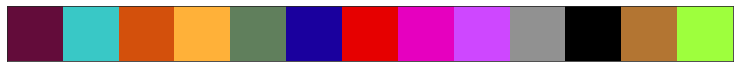

In [16]:
# %matplotlib inline

# #set font size of labels on matplotlib plots
# plt.rc('font', size=16)

# #set style of plots
# sns.set_style('white')

# #define a custom palette
# customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139', '#607F5C', '#1A009E', '#E60000', '#E600BF', '#CE47FF', '#919191', '#000000', '#B37532', '#9EFF3D']
# sns.set_palette(customPalette)
# sns.palplot(customPalette)

In [18]:
# facet = sns.lmplot(data=clusters, x='x', y='y', hue='label', 
#                    fit_reg=False, legend=True, legend_out=True)

C:\Users\geoen\AppData\Roaming\Python\Python37\site-packages\seaborn\regression.py:551: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = data[cols]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [33]:
countDict = {x:0 for x in range(13)}
docLists = {x:[] for x in range(13)}
for i in range(len(clusters)):
    countDict[clusters[i]] += 1
    docLists[clusters[i]].append(i) 
    
countDict

{0: 114,
 1: 111,
 2: 410,
 3: 38,
 4: 57,
 5: 47,
 6: 342,
 7: 5,
 8: 19,
 9: 97,
 10: 92,
 11: 15,
 12: 226}

In [30]:
dump(aggCluster, 'hierarchical.joblib')

['hierarchical.joblib']

In [39]:
freqVecs = [[0] * vectorizedEssays[i[0]].getnnz() for i in docLists.values()]

for cluster, docs in docLists.items():
    for doc in docs:
        freqVecs[cluster] = [freqVecs[cluster][i] + vectorizedEssays[doc][i] for i in range(len(freqVecs[cluster]))]
print(freqVecs)

IndexError: row index (1) out of range

In [45]:
fileGroups = []
for _ in range(13):
    fileGroups.append([])
for cluster, docs in docLists.items():
    for doc in docs:
        fileGroups[cluster].append(essays[doc])
        
[len(x) for x in fileGroups]

[114, 111, 410, 38, 57, 47, 342, 5, 19, 97, 92, 15, 226]

In [46]:
(open('essayGroups', 'w', encoding="ISO-8859-1").write(str(fileGroups)))

62636